# 데이터 읽고 데이터 프레임에 저장

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd

def read_csv_infolder(source_folder):
    csv_files = [f for f in listdir(source_folder) if isfile(join(source_folder, f))]
    new_list = []
    for i,v in enumerate(csv_files):
        new_dict ={}
        if 'txt' in v:
            new_dict['sub'] = pd.read_csv(r'{}\{}'.format(source_folder,v),sep = '\t',encoding = 'utf-8')
            new_dict['title'] = v
            new_list.append(new_dict)
        elif 'csv' in v:
            new_dict['sub'] = pd.read_csv(r'{}\{}'.format(source_folder,v),sep = '|',encoding = 'utf-8')
            new_dict['title'] = v
            new_list.append(new_dict)
    new_df = pd.DataFrame(new_list)
    return new_df

In [2]:
udong_gender = r'.\이노베이션(미세먼지)\성연령유동'
udong_time = r'.\이노베이션(미세먼지)\시간대유동'
card_spending = r'.\이노베이션(미세먼지)\카드메출데이터\CARD_SPENDING'
jongrogu = r'.\이노베이션(미세먼지)\종로구'
noonegu = r'.\이노베이션(미세먼지)\노원구'

In [3]:
card_spending_df = read_csv_infolder(card_spending)

In [4]:
card_spending_df['sub'][0]['STD_DD']  = card_spending_df['sub'][0]['STD_DD'].astype('str')
v=card_spending_df['sub'][0]['STD_DD']
card_spending_df['sub'][0]['STD_DD'] = pd.to_datetime(card_spending_df['sub'][0]['STD_DD']).apply(lambda x:x.strftime('%d/%m/%Y'))

In [9]:
i = card_spending_df['sub'][0].MCT_CAT_CD.value_counts()

In [11]:
g = i.index

In [13]:
df = []
for j in g:
    df.append(card_spending_df['sub'][0].loc[card_spending_df['sub'][0]['MCT_CAT_CD']==j,:])

In [17]:
for i in range(len(df)):
    df[i] = df[i].groupby(df[i].STD_DD).sum()
    df[i].index = pd.DatetimeIndex(df[i].index)

In [27]:
df[0]=df[0].sort_values('STD_DD')

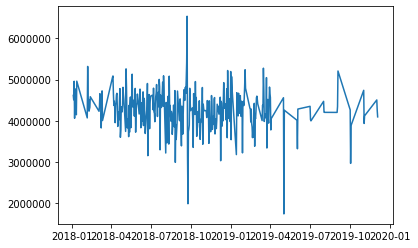

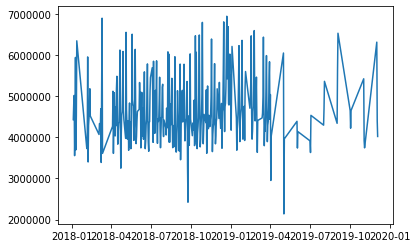

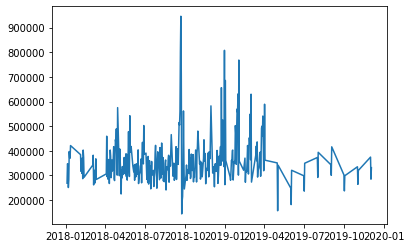

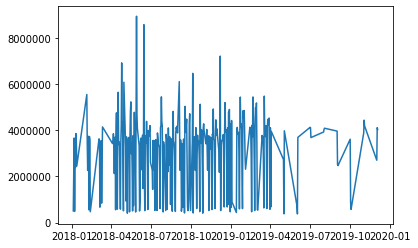

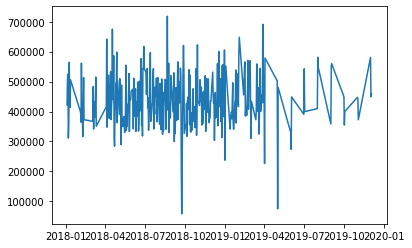

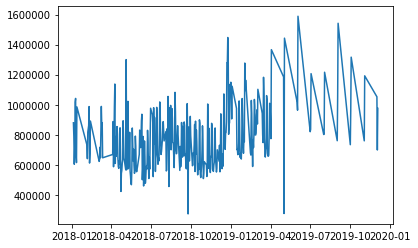

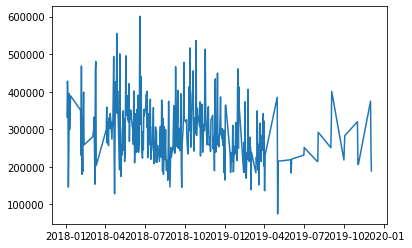

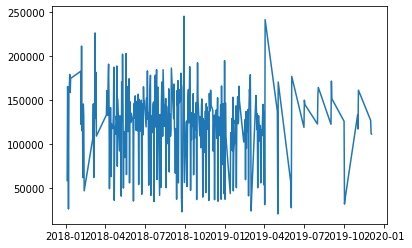

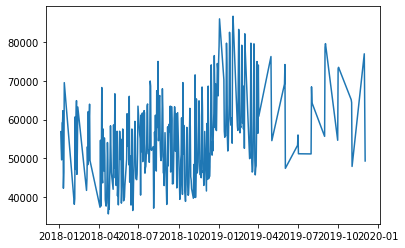

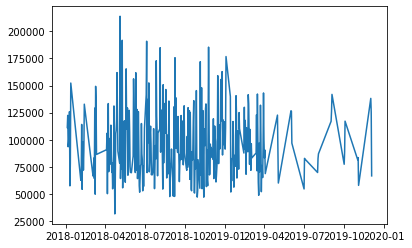

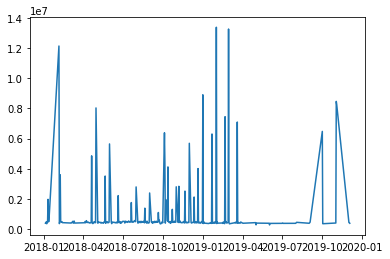

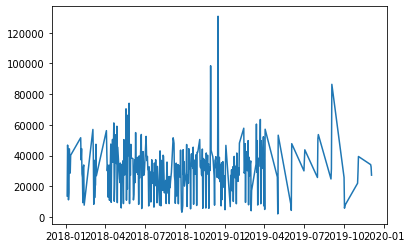

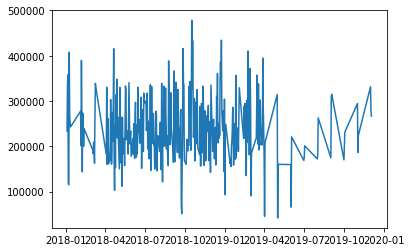

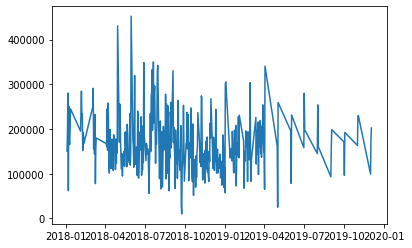

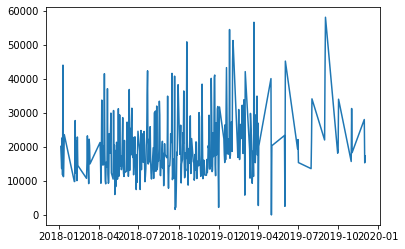

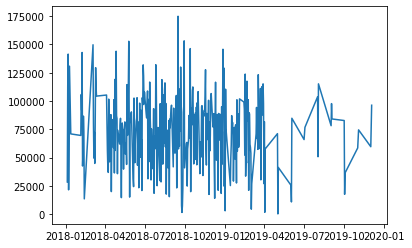

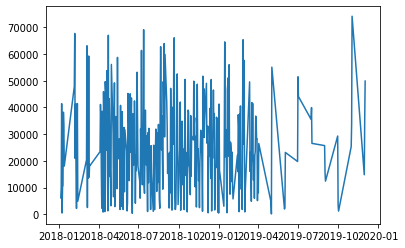

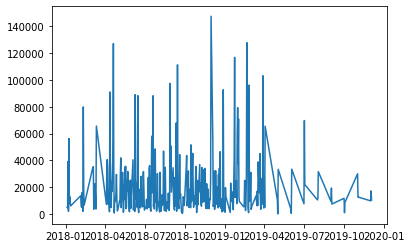

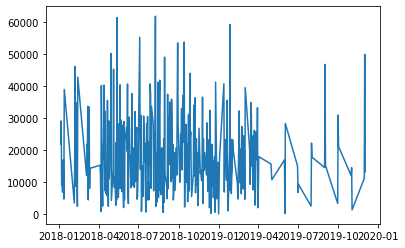

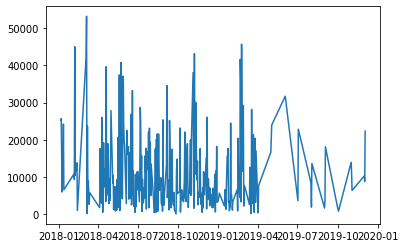

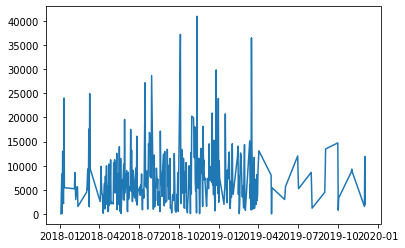

In [47]:
import matplotlib.pyplot as plt
#year과 pop은 미리 세팅됨
# Make a line plot: year on the x-axis, pop on the y-axis
for i in range(len(df)):
    plt.plot(df[i].sort_values('STD_DD').index,df[i].sort_values('STD_DD').USE_AMT)
    plt.show()
# plt.plot(pp.sort_values('STD_DD').index,pp.sort_values('STD_DD').USE_AMT)

# Histogram of life_exp1950, 15 bins
# plt.hist(pp.index)
# Show and clear plot again
plt.show()
# plt.clf()

C:\Users\82102\Anaconda3\envs\my_python\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


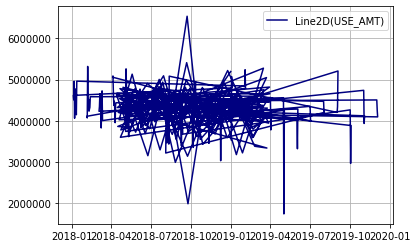

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twinx()
line1 = ax1.plot(df[0].USE_AMT,color ='navy',label = 'USE_AMT',)
# line1 = ax1.plot(card_spending_df['sub'][0].loc[card_spending_df['sub'][0]['MCT_CAT_CD']==g,:].USE_AMT,color ='navy',label = 'USE_AMT',)
# line2 = ax2.plot(df6.BMR,color ='red',label = 'BMR',linestyle = '--')
# line3= line1+line2
# labels = [l.get_label() for l in line3]

plt.legend(line1)
plt.grid()
# plt.plot(df6['tone_i'],df6['BMR'])

# df6['tone_i'].plot.line(ylim = )
# df6['BMR'].plot.line(ylim = (0))